<a href="https://colab.research.google.com/github/asyaf/deep_strawberry/blob/master/deep_strawberry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Tensorflow
import tensorflow as tf
print(tf.__version__)

# I/O libraries
import os
from io import BytesIO
import tarfile
import tempfile
from six.moves import urllib

# Helper libraries
import matplotlib
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import cv2 as cv
from tqdm import tqdm
import IPython
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

# Comment this out if you want to see Deprecation warnings
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

import sys

1.15.0-rc3


In [0]:
!git clone 'https://github.com/asyaf/deep_strawberry.git'

fatal: destination path 'deep_strawberry' already exists and is not an empty directory.


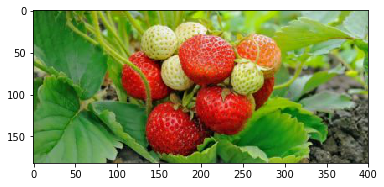

In [0]:
# show random image from training dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

TRAIN_PATH = "deep_strawberry/customImages/train/"
images = glob.glob(TRAIN_PATH + '/*.jpg')
rand_image = random.choice(images)
image = mpimg.imread(rand_image)
plt.imshow(image)
plt.show()

In [0]:
%cd deep_strawberry
!python custom.py train --dataset="customImages" --weights=coco --save ll

[Errno 2] No such file or directory: 'deep_strawberry'
/content/deep_strawberry
Using TensorFlow backend.
Weights:  coco
Dataset:  customImages
Logs:  /content/deep_strawberry/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 

In [0]:
!ls logs/strawberry20191017T0848/

events.out.tfevents.1571302123.e76c96bda50b  mask_rcnn_strawberry_0006.h5
mask_rcnn_strawberry_0001.h5		     mask_rcnn_strawberry_0007.h5
mask_rcnn_strawberry_0002.h5		     mask_rcnn_strawberry_0008.h5
mask_rcnn_strawberry_0003.h5		     mask_rcnn_strawberry_0009.h5
mask_rcnn_strawberry_0004.h5		     mask_rcnn_strawberry_0010.h5
mask_rcnn_strawberry_0005.h5


In [0]:
from google.colab import files
MODEL_DIR = "logs/strawberry20191017T0848/"
model_file = os.path.join(MODEL_DIR, 'mask_rcnn_strawberry_0009.h5')
files.download(model_file)

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 51466, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
import os
import cv2
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage
import glob

# Root directory of the project
ROOT_DIR = os.getcwd()

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import custom 

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "model")

custom_WEIGHTS_PATH = "mask_rcnn_damage_0010.h5"  # TODO: update this path

Using TensorFlow backend.


In [0]:
config = custom.CustomConfig()
custom_DIR = os.path.join(ROOT_DIR, "customImages")
DEVICE = "/cpu:0" 
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [0]:
# load the last model you trained
# weights_path = model.find_last()[1]

# Load weights
!dir
custom_WEIGHTS_PATH = os.path.join("models", "mask_rcnn_strawberry_0009.h5")
MODEL_DIR = "logs/strawberry20191017T0848/"
model_file = os.path.join(MODEL_DIR, 'mask_rcnn_strawberry_0009.h5')
print("Loading weights ", model_file)
if os.path.exists(model_file):
  print("exists")
model.load_weights(model_file, by_name=True)

customImages		   LICENSE	      model	   README.md
custom.py		   logs		      mrcnn	   requirements.txt
inspect_custom_data.ipynb  mask_rcnn_coco.h5  __pycache__  setup.py
Loading weights  logs/strawberry20191017T0848/mask_rcnn_strawberry_0009.h5
exists






Re-starting from epoch 9


In [0]:
from importlib import reload # was constantly changin the visualization, so I decided to reload it instead of notebook
reload(visualize)

<module 'mrcnn.visualize' from '/content/deep_strawberry/mrcnn/visualize.py'>

In [0]:
# Load validation dataset
dataset = custom.CustomDataset()
dataset.load_custom(custom_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 8
Classes: ['BG', 'strawberry']


In [0]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [0]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

image ID: strawberry.strawberry (38).jpg (4) /content/deep_strawberry/customImages/val/strawberry (38).jpg
Processing 2 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  253.00000  uint8
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  253.00000  uint8
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (2, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (2, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  388.00000  max:  725.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool


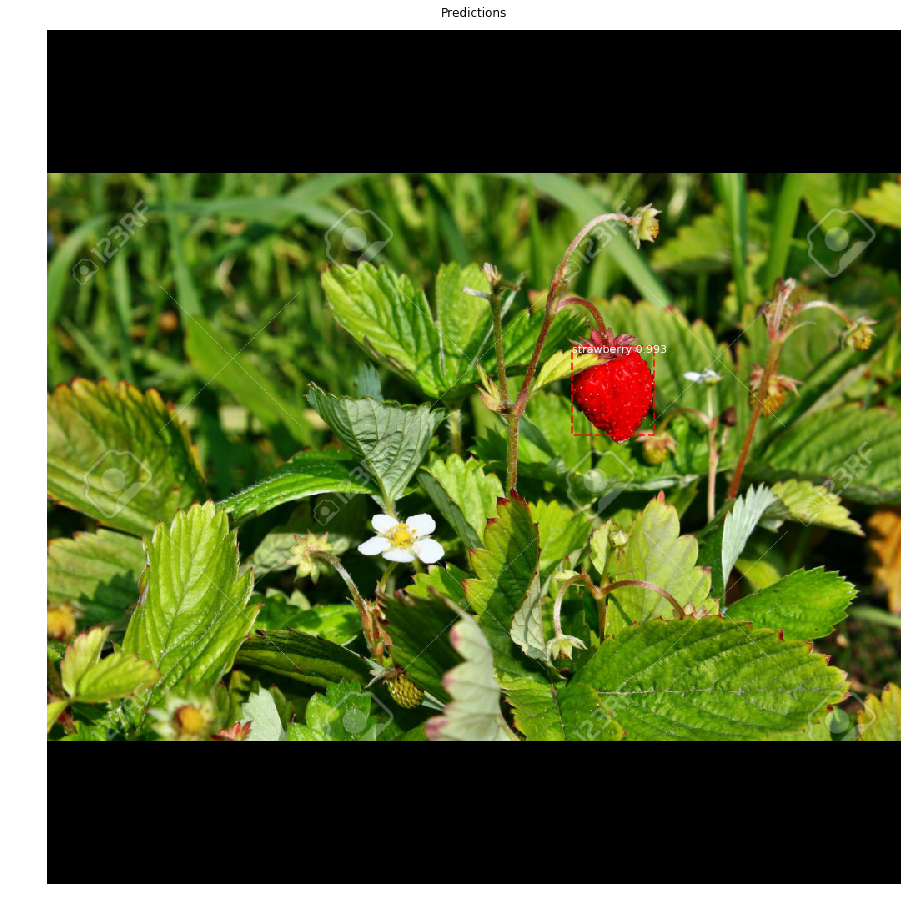

In [0]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image, image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)